In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
city_ride_data_df = pd.merge(ride_data_df, city_data_df, on="city", how="left")
# Display the data table for preview
city_ride_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

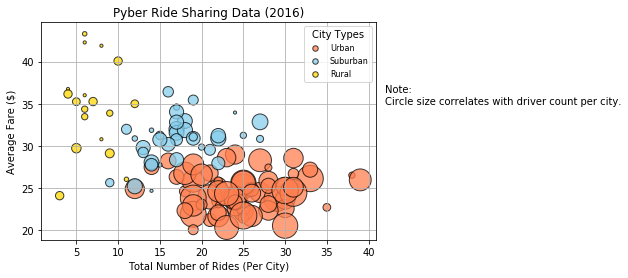

In [3]:
# Obtain the x and y coordinates for each of the three city types

# create a group by object for the cities
city_grouped = city_ride_data_df.groupby(["city"])

# find total number of rides per city
total_rides_city = city_grouped["ride_id"].count()

# calculate average fare per city
avg_fare_city = round(city_grouped["fare"].mean(),2)

# calculate driver count per city to be used for sizing of bubbles
driver_count_city = city_grouped["driver_count"].mean()

# city type series
city_type = city_data_df.set_index("city")["type"]

# create a DataFrame from the results of calculations
city_stats = pd.DataFrame({"Ride Count":total_rides_city,
                         "Average Fare":avg_fare_city,
                         "Driver Count":driver_count_city,
                         "City Type":city_type})

# separate city_data by each city type
rural_cities = city_stats[city_stats["City Type"]=="Rural"]
urban_cities = city_stats[city_stats["City Type"]=="Urban"]
suburban_cities = city_stats[city_stats["City Type"]=="Suburban"]

# Build the scatter plots for each city types
plt.scatter(urban_cities["Ride Count"], urban_cities["Average Fare"], s=urban_cities["Driver Count"]*10, c="Coral", 
            marker='o', alpha=0.75, edgecolors="black", label="Urban")
plt.scatter(suburban_cities["Ride Count"], suburban_cities["Average Fare"], s=suburban_cities["Driver Count"]*10, 
            c="SkyBlue", marker='o', alpha=0.75, edgecolors="black", label="Suburban")
plt.scatter(rural_cities["Ride Count"], rural_cities["Average Fare"], s=rural_cities["Driver Count"]*10, c="Gold", 
            marker='o', alpha=0.75, edgecolors="black", label="Rural")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(title="City Types", loc="best", fontsize=8)

# legend sizing is off; reset sizes (https://stackoverflow.com/questions/24706125/
# setting-a-fixed-size-for-points-in-legend)
legend.legendHandles[0]._sizes=[30]
legend.legendHandles[1]._sizes=[30]
legend.legendHandles[2]._sizes=[30]

# Incorporate a text label regarding circle size (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html)
plt.text(42, 35, "Note: \nCircle size correlates with driver count per city.", fontsize=10)

# Save Figure
plt.savefig("../Images/Ride_Sharing_Data.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

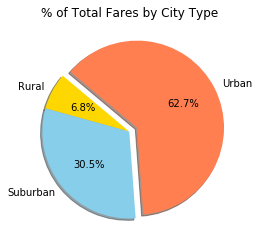

In [10]:
# Calculate Type Percents
type_grouped = city_ride_data_df.groupby(["type"])

# Total fare
total_fare = type_grouped["fare"].sum()
total_fare

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Total_Fares_By_Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

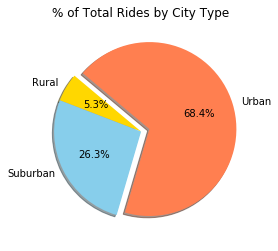

In [5]:
# Calculate Ride Percents
total_rides = type_grouped["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Total_Rides_By_Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

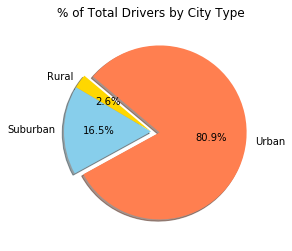

In [11]:
# Calculate Driver Percents
type_grouped_2 = city_data_df.groupby(["type"])
total_drivers = type_grouped_2["driver_count"].sum()
total_drivers

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Total_Drivers_By_Type.png")

# Show Figure
plt.show()

## Observations

- Due to lower accessibility to drivers in Rural areas, average fares tend to be higher in these areas. It appears there is still a demand for ride sharing programs in these areas, so higher fares makes sense due to a lower supply.

- Urban cities have nearly 5 times as many drivers than Suburban cities, yet Suburban cities make up nearly 1/3 of the total fares. This could be due to residents in Suburban cities wanting to travel to the Urban areas, so fares tend to be a little higher than in Urban cities.

- Because of the accessbility, Urban cities make up more than 2/3 of all rides. The supply of drivers in these areas keeps fares lower than you'd see in Rural or Suburban cities, with average fares in Urban cities being 30 dollars or less.